# **Deep Learning & AI - Computational Communication Spring School**

In [ ]:
pip install tensorflow

In [54]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# **Working with variables, placeholders and constants**

In [46]:
a = tf.constant(5.0,tf.float32)
b = tf.constant(3.0)
sess = tf.Session()
print(sess.run([a,b]))
sess.close()

[5.0, 3.0]


# **Example 1: Use of a TensorFlow operation**

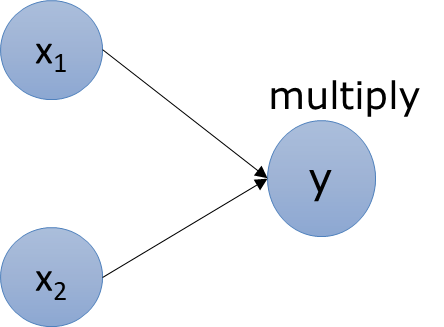

In [96]:
x1 = tf.placeholder(tf.int32)
x2 = tf.placeholder(tf.int32)
sess = tf.Session()
print(sess.run(tf.multiply(x1,x2),{x1:[3,4],x2:[5,1]}))
sess.close()

[15  4]


# **Example 2: Use of TensorFlow operations**

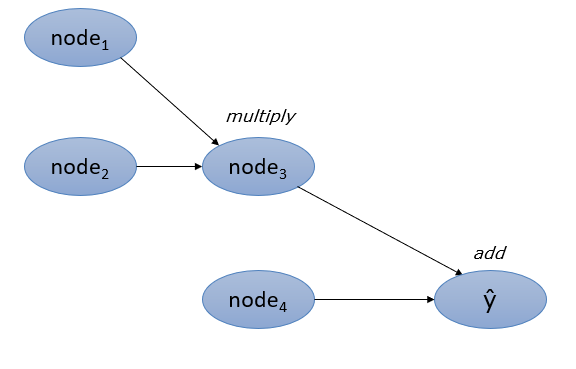

In [97]:
node_1 = tf.Variable([0.3],tf.float32)
node_2 = tf.Variable([0.7],tf.float32)
node_3 = tf.multiply(node_1,node_2)
node_4 = tf.Variable([0.29],tf.float32)

#initialising variables explicitly in a session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(tf.add(node_3,node_4)))
sess.close()

[0.5]


# **Single-layer Perceptron Example using a non-linear activation (sigmoid) function and calculating loss**

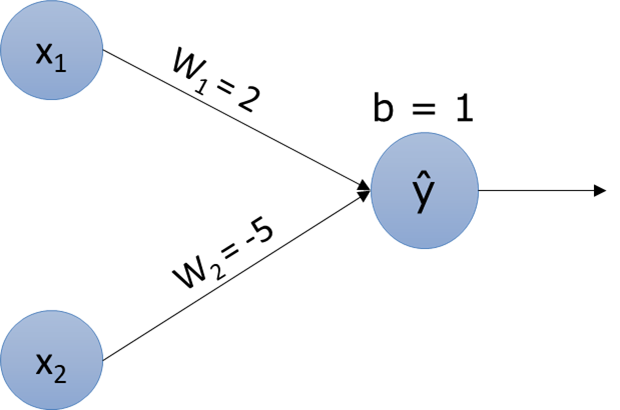

In [25]:
input_X = tf.constant([[1., 1.]])
weight_W = tf.Variable([[2.], [-5.]])
bias_B = tf.Variable(1.0,tf.float32)
expected_output = tf.placeholder(tf.float32)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

##Use of sigmoid function as an activation function tf.sigmoid(), tf.matmul() used for the dot product between the vectors X & W and a bias is thereafter added.
predicted_output = tf.sigmoid(tf.reduce_sum(tf.multiply(input_X,weight_W)+bias_B))

##Use of relu as an activation function
#predicted_output = tf.nn.relu(tf.matmul(input_X,weight_W)+bias_B)

##Computing the error in prediction and thus computing the loss using Root Mean Squared Loss
prediction_error = tf.sqrt(tf.reduce_sum(tf.squared_difference(expected_output,predicted_output)))
print("Prediction loss when bias is",sess.run(bias_B),"and predicted output is",sess.run(predicted_output),":",sess.run(prediction_error,{expected_output:[-1]}))
sess.close()

Prediction loss when bias is 1.0 and predicted output is 0.11920291 : 1.1192029


# **Implementing AND gate with threshold activation function**

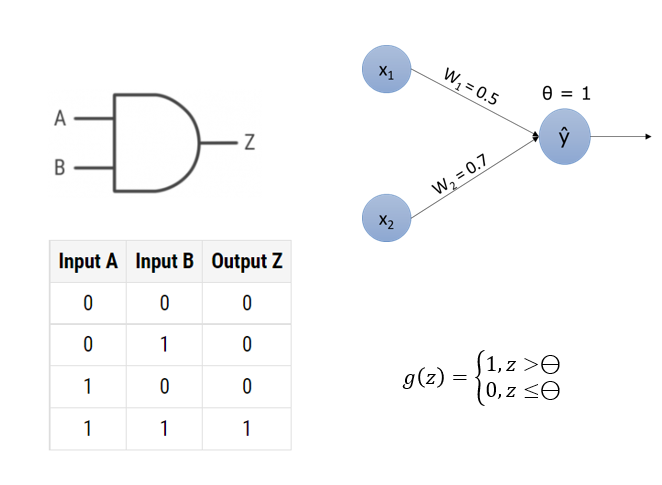

In [24]:
x_new = [[0.0, 0.0],
         [0.0,1.0],
         [1.0,0.0],
         [1.0,1.0]]
w_new = tf.Variable([[0.5], [0.7]])


def my_step(x):
    is_greater = tf.greater(x,1)
    as_float = tf.to_float(is_greater)
    return as_float

sess = tf.Session()
sess.run(tf.initialize_all_variables())

lin_mod_new = tf.matmul(x_new,w_new)
output = my_step(lin_mod_new)
print(sess.run(output))
sess.close()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use `tf.cast` instead.
[[0.]
 [0.]
 [0.]
 [1.]]
